# Business Understanding
Hacer un portafolio de inversión requiere de revisar las metodologías existentes. Para este ejercicio mostraré 2 metodologías, el modelo de Markowitz y el modelo Kelly Criterion. Si me dio tiempo, estaría mostrando el modelo CAPM.

# Data Aquisition and Understanding
¿Alguna vez has visitado Yahoo Finance? Es un lugar obligado para obtener datos de stocks!. Y los datos pueden ser consumidos usando Python.

In [1]:
!pip install yfinance

In [2]:
!pip install forex_python

In [3]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from forex_python.converter import CurrencyRates
from datetime import datetime

Vamos a mantenerlo sencillo. Necesitamos los precios de cierre de los stocks, y por supuesto, unos stocks! Si buscas rápido en [https://bing.com](bing.com) por el texto "***top stocks june 2024***" encontrarás entradas interesantes como esta [https://www.forbes.com/advisor/investing/best-stocks-to-buy-now/].

Ahora, vamos a traer los datos de los stocks a unos data frames. Vamos a practicar Python e inglés al mismo tiempo! 

In [4]:
portfolio = ['SPOT', 'PGR', 'GOOGL', 'ISRG', 'TPR', 'BLD', 'C', 'KHC', 'FIS']

In [5]:
stock_prices = pd.DataFrame()
stock_returns = pd.DataFrame()

# Get today's date
today_date = datetime.now()
# Convert the date to a string
end = today_date.strftime('%Y-%m-%d')

# For each stock in the portfolio, it adds the closure value and calculates the returns percentage (+/-)
for x in portfolio:
    stock = yf.Ticker(x)
    close_price = stock.history(start='2021-01-01', end=end)['Close']

    # Concats each stock as a new column
    stock_prices = pd.concat([stock_prices, close_price], axis=1)

    # Calculates percent return compared with the previous close and adds it as a new column for each stock
    stock_returns = pd.concat([stock_returns, close_price.pct_change()], axis=1)

# Each column has the stock name
stock_prices.columns = portfolio
stock_returns.columns = portfolio

# Lets drop NAs
stock_prices = stock_prices.dropna()
stock_returns = stock_returns.dropna()

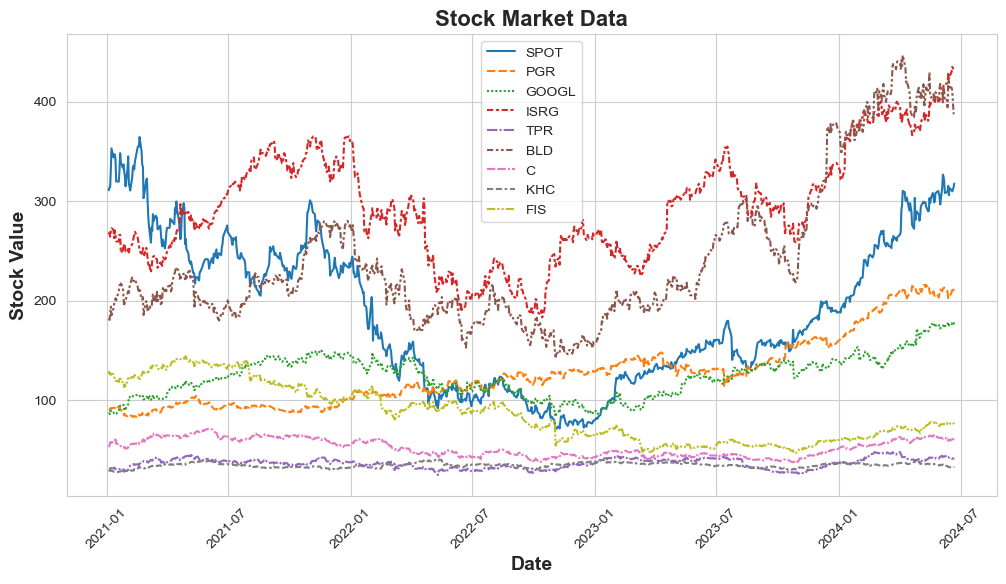

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_prices)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Value', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

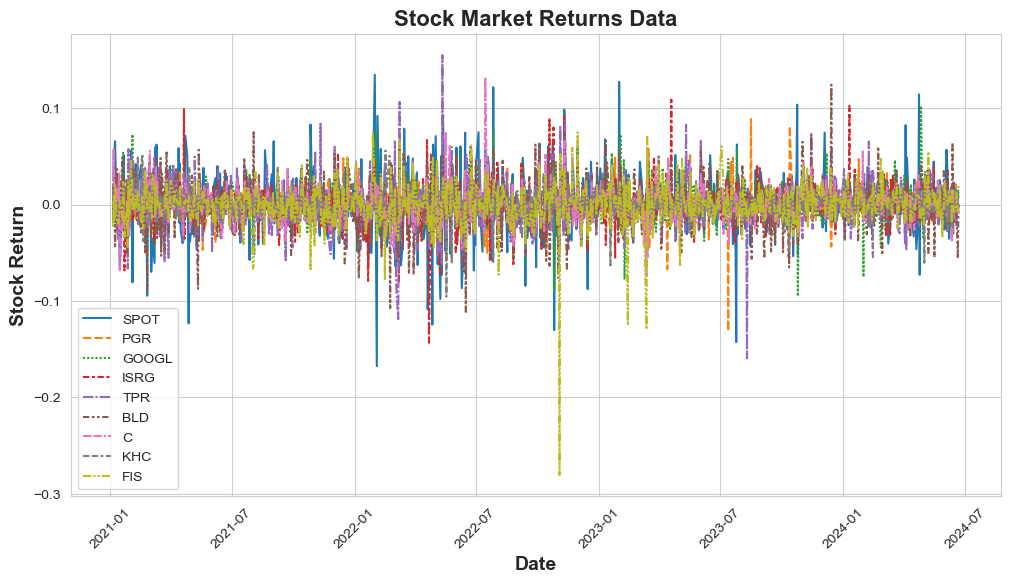

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))  # Width, height in inches

# Set the style of seaborn for a cleaner look
sns.set_style('whitegrid')

# Plot using seaborn with more readable formatting
sns.lineplot(data=stock_returns)

# Enhance the readability of the plot
plt.xticks(rotation=45)  # Rotate date labels
plt.xlabel('Date', fontsize=14, fontweight='bold')  # Bolder and larger x-axis label
plt.ylabel('Stock Return', fontsize=14, fontweight='bold')  # Bolder and larger y-axis label
plt.title('Stock Market Returns Data', fontsize=16, fontweight='bold')  # Bolder and larger title

# Show the plot
plt.show()

In [8]:
expected_stock_returns = []
individual_stock_risk = []

for x, y in stock_returns.items():
    # Mean of returns for each stock
    expected_stock_returns.append(y.mean())

    # Std. Dev. of returns for each stock
    individual_stock_risk.append(y.std())

In [9]:
print(f"Mean return (percent)")

for name, value in zip(stock_prices, expected_stock_returns):
    print(f"\t{name}: \t{value * 100}")

Mean return (percent)
	SPOT: 	0.05243188354986573
	PGR: 	0.10918671521780662
	GOOGL: 	0.1037416164788787
	ISRG: 	0.07747735666558703
	TPR: 	0.0694001691693199
	BLD: 	0.12063412279426863
	C: 	0.02997685873773659
	KHC: 	0.022164115993848633
	FIS: 	-0.03566410912313325


In [10]:
print(f"Risk (Std. Dev)")

for name, value in zip(stock_prices, individual_stock_risk):
    print(f"\t{name}: \t ±{value}")


Risk (Std. Dev)
	SPOT: 	 ±0.03152852596709528
	PGR: 	 ±0.01556968164582929
	GOOGL: 	 ±0.019724638699974085
	ISRG: 	 ±0.02093036484793896
	TPR: 	 ±0.024858587606768498
	BLD: 	 ±0.025749191566767887
	C: 	 ±0.01740002399032612
	KHC: 	 ±0.013588600324637818
	FIS: 	 ±0.021944136143707955


In [11]:
# Vectorization
expected_stock_returns = np.array(pd.DataFrame(expected_stock_returns))

# Vectorization
individual_stock_risk = np.array(pd.DataFrame(individual_stock_risk))

# Covariance matrix of "Percent change per stock"
stock_returns_cov_matrix = np.array(stock_returns.cov())

In [12]:
stock_returns_cov_matrix

array([[ 9.94047950e-04,  3.69058072e-05,  3.02672329e-04,
         2.93169743e-04,  2.49861975e-04,  2.89078041e-04,
         1.61358382e-04, -1.60274373e-05,  1.93713778e-04],
       [ 3.69058072e-05,  2.42414987e-04,  3.97181747e-05,
         6.32009336e-05,  5.60568602e-05,  6.58039100e-05,
         6.81855751e-05,  4.13905892e-05,  6.36265487e-05],
       [ 3.02672329e-04,  3.97181747e-05,  3.89061372e-04,
         2.09356439e-04,  1.72645684e-04,  2.05307585e-04,
         1.09945158e-04,  1.32095009e-05,  1.48502713e-04],
       [ 2.93169743e-04,  6.32009336e-05,  2.09356439e-04,
         4.38080173e-04,  1.65926259e-04,  2.29279266e-04,
         1.12677874e-04,  3.73763796e-05,  1.50804060e-04],
       [ 2.49861975e-04,  5.60568602e-05,  1.72645684e-04,
         1.65926259e-04,  6.17949378e-04,  3.31698867e-04,
         2.00941818e-04,  1.94468287e-05,  1.90652822e-04],
       [ 2.89078041e-04,  6.58039100e-05,  2.05307585e-04,
         2.29279266e-04,  3.31698867e-04,  6.630208

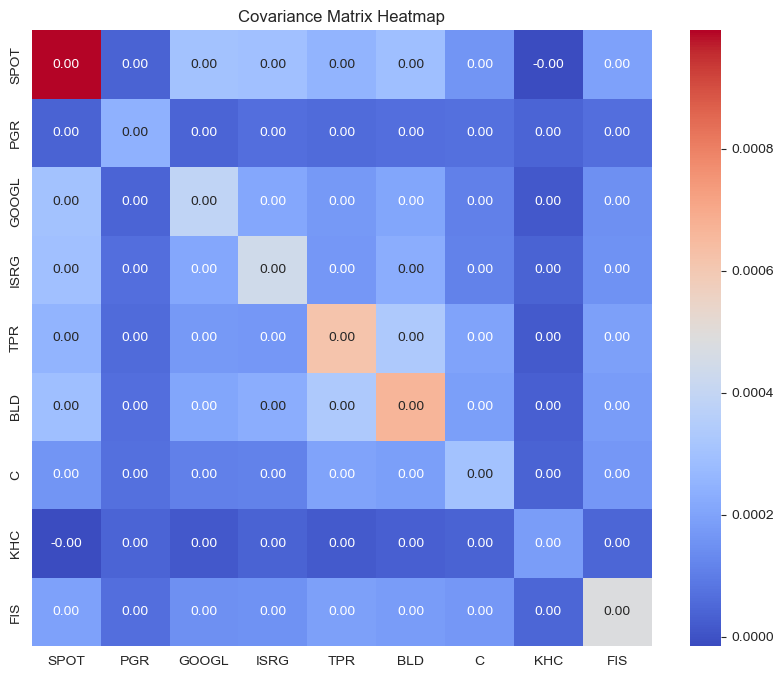

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stock_returns' is your DataFrame with stock return data
# Calculate the covariance matrix using Pandas
cov_matrix_df = stock_returns.cov()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(cov_matrix_df, annot=True, fmt='.2f', cmap='coolwarm')

# Add title
plt.title('Covariance Matrix Heatmap')

# Show the plot
plt.show()

In [14]:
cov_matrix_df

,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
SPOT,0.000994,0.000037,0.000303,0.000293,0.000250,0.000289,0.000161,-0.000016,0.000194
PGR,0.000037,0.000242,0.000040,0.000063,0.000056,0.000066,0.000068,0.000041,0.000064
GOOGL,0.000303,0.000040,0.000389,0.000209,0.000173,0.000205,0.000110,0.000013,0.000149
ISRG,0.000293,0.000063,0.000209,0.000438,0.000166,0.000229,0.000113,0.000037,0.000151
TPR,0.000250,0.000056,0.000173,0.000166,0.000618,0.000332,0.000201,0.000019,0.000191
BLD,0.000289,0.000066,0.000205,0.000229,0.000332,0.000663,0.000187,0.000030,0.000181
C,0.000161,0.000068,0.000110,0.000113,0.000201,0.000187,0.000303,0.000037,0.000166
KHC,-0.000016,0.000041,0.000013,0.000037,0.000019,0.000030,0.000037,0.000185,0.000046
FIS,0.000194,0.000064,0.000149,0.000151,0.000191,0.000181,0.000166,0.000046,0.000482


¿Y qué buscamos?. ¿Crecimiento en tandem o independencia entre stocks?. Es una pregunta difícil, quizá estén cómodos con un mix. Es decir, que stocks con alto retorno se relacione con otros, esto trae mayor riesgo pero ahí pueden estar las ganancias. Por supuesto queremos evitar stocks con covarianza negativa. Quizá también queremos tener stocks cuya correlación es cerca a 0 y que presentan un alto retorno, !grandes ganancias y mejor diversificación¡
No es una tarea fácil. Aquí es donde aplicar el modelo de Markowitz será de utilidad.

**Nota**: Sólo se consideraron datos desde 2021-01-01. ¿Cuál es el motivo?. Qué las restricciones de la pandemia se relajaron en este punto y el comportamiento de los mercados tiene una tendencia más clara desde ese día.

# Modeling
Para automatizar la toma de decisiones tendremos que usar alguna librería que realice la optimización. Dicha optimización minimizará la volatilidad a partir de la covarianza maximizando los retornos. Usaremos `PyPortfolioOpt`.

## Modelo de Markowitz
Este modelo es un clásico dentro de la teoría de optimización de portafolios. Se basa en la premisa de que los retornos (en mi caso, retornos de stocks) vienen de una distribución normal. Muchos papers nos han dejado ver que en realidad en las colas tenemos eventos que no son para nada raros y que, por lo mismo, no cumplen las características de la distribución normal.

Aún así, es un buen punto inicial. ¿Acaso la regresión no genera los primeros modelos base que usamos luego para comparación con modelos más elaborados?. 

Según Kanungo, D. K.(2023), el propio Harry Markowitz (finado en 2023) no usaba su propio modelo. Por dicho modelo fue merecedor de el **John von Neumann Theory Prize** en 1989 y el premio **Nobel** en 1990.

In [15]:
!pip install pyportfolioopt

In [16]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(expected_stock_returns, stock_returns_cov_matrix, weight_bounds=(0,1))

In [17]:
?ef

Type:           EfficientFrontier
String form:    <pypfopt.efficient_frontier.efficient_frontier.EfficientFrontier object at 0x0000023AFB2ED890>
File:           c:\users\imedi\anaconda3\envs\datapub202406\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py
Docstring:     
An EfficientFrontier object (inheriting from BaseConvexOptimizer) contains multiple
optimization methods that can be called (corresponding to different objective
functions) with various parameters. Note: a new EfficientFrontier object should
be instantiated if you want to make any change to objectives/constraints/bounds/parameters.

Instance variables:

- Inputs:

    - ``n_assets`` - int
    - ``tickers`` - str list
    - ``bounds`` - float tuple OR (float tuple) list
    - ``cov_matrix`` - np.ndarray
    - ``expected_returns`` - np.ndarray
    - ``solver`` - str
    - ``solver_options`` - {str: str} dict

- Output: ``weights`` - np.ndarray

Public methods:

- ``min_volatility()`` optimizes for minimum

In [18]:
ratios_min_volatility = ef.min_volatility()

In [19]:
cleaned_ratios = pd.Series(ratios_min_volatility)
cleaned_ratios.index = portfolio

cleaned_ratios

SPOT     0.018143
PGR      0.248913
GOOGL    0.125144
ISRG     0.028498
TPR      0.025332
BLD      0.000000
C        0.114655
KHC      0.418196
FIS      0.021119
dtype: float64

In [20]:
optimal_portfolio = np.expand_dims(cleaned_ratios, axis=0)
optimal_portfolio

array([[0.01814328, 0.24891282, 0.12514421, 0.02849756, 0.02533159,
        0.        , 0.11465495, 0.41819645, 0.02111915]])

In [21]:
# Expected return with the optimal solution
opt_portfolio_expected_return = np.matmul(optimal_portfolio, expected_stock_returns)
opt_portfolio_expected_return

array([[0.00057031]])

In [22]:
# Std. Dev. for the optimal solution
opt_portfolio_var = np.matmul(optimal_portfolio, \
                          np.matmul(stock_returns_cov_matrix, optimal_portfolio.transpose()))
opt_portfolio_var

array([[9.56723203e-05]])

In [23]:
opt_portfolio_risk = math.sqrt(opt_portfolio_var)
opt_portfolio_risk

C:\Users\imedi\AppData\Local\Temp\ipykernel_10356\3615998991.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  opt_portfolio_risk = math.sqrt(opt_portfolio_var)


0.009781222845099488

In [24]:
mxn_investment_amount = 10000.00
mxn_to_usd_exchange_rate = 18.50

In [25]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

# Final report:
print(f'Optimal Markowitz Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {opt_portfolio_expected_return[0][0]*100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*opt_portfolio_expected_return[0][0]*52*5:.2f}')
print(f'   -Variance: +/-{opt_portfolio_var[0][0]*100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*opt_portfolio_var[0][0]*52*5:.2f}')
print(f'   -Risk: {opt_portfolio_risk*100:.2f}%')
print('   -Portfolio composition:')
for symbol, percentage in cleaned_ratios.sort_values(ascending= False).items():
    print(f'\tStock: {symbol}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')


Optimal Markowitz Portfolio (MXN amount: 10000.0. USD amount: 540.5405405405405):
   -Expected earns (daily): 0.06%.
	Expected amount (Yearly): $80.15
   -Variance: +/-0.01%
	Expected variance amount (Yearly): +/-$13.45
   -Risk: 0.98%
   -Portfolio composition:
	Stock: KHC. 	Percentage: 41.82%.	Amount: $226.05.
	Stock: PGR. 	Percentage: 24.89%.	Amount: $134.55.
	Stock: GOOGL. 	Percentage: 12.51%.	Amount: $67.65.
	Stock: C. 	Percentage: 11.47%.	Amount: $61.98.
	Stock: ISRG. 	Percentage: 2.85%.	Amount: $15.40.
	Stock: TPR. 	Percentage: 2.53%.	Amount: $13.69.
	Stock: FIS. 	Percentage: 2.11%.	Amount: $11.42.
	Stock: SPOT. 	Percentage: 1.81%.	Amount: $9.81.
	Stock: BLD. 	Percentage: 0.00%.	Amount: $0.00.


## Modelo Kelly Criterion

Este modelo, también llamado "algoritmo de de crecimiento óptimo de capital" fue publicado en 1956 por John Kelly. Su efectividad está mas bien en el corto plazo minimizando la ruina financiera. Este modelo sobre simplifíca los mercados.

In [26]:
stock_prices

,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
2021-01-04 00:00:00-05:00,311.000000,89.892311,86.207565,266.666656,29.773249,181.520004,52.661312,29.454948,129.165665
2021-01-05 00:00:00-05:00,313.720001,89.725739,86.902763,268.350006,29.600311,180.589996,54.027321,28.887014,126.183693
2021-01-06 00:00:00-05:00,314.239990,91.428635,86.045242,264.263336,31.238705,186.190002,57.135860,29.205406,127.393097
2021-01-07 00:00:00-05:00,331.359985,91.962509,88.615303,269.403320,31.739325,194.000000,57.810093,28.994581,125.343575
2021-01-08 00:00:00-05:00,353.109985,91.729538,89.788452,272.916656,31.156784,185.309998,57.240936,28.930040,128.011658
...,...,...,...,...,...,...,...,...,...
2024-06-14 00:00:00-04:00,313.019989,203.919998,176.789993,425.779999,41.810001,414.390015,59.330002,32.380001,76.570000
2024-06-17 00:00:00-04:00,311.220001,208.240005,177.240005,430.000000,41.919998,414.179993,60.060001,32.919998,76.120003
2024-06-18 00:00:00-04:00,309.899994,210.750000,175.089996,435.000000,41.009998,411.290009,60.779999,32.669998,77.050003
2024-06-20 00:00:00-04:00,313.890015,210.850006,176.300003,432.549988,41.310001,388.179993,60.619999,32.639999,76.480003


In [27]:
!pip install pyomo

Es necesario instalar el solver `ipopt`. En un Linux esto se haría con los siguientes comandos.

!wget -N -q "https://matematica.unipv.it/gualandi/solvers/ipopt-linux64.zip" \
!mv ipopt-linux64.zip ../ipopt \
!ls ../ipopt \
cd stock_portfolio_optimization/ \
cd ipopt/ \
unzip -o -q ipopt-linux64 \
ls

En Windows. Descarguen el folder https://www.coin-or.org/download/binary/Ipopt/ y copie el contenido del zip póngalo en la carpeta ipopt.

In [28]:
from pyomo.environ import *

In [29]:
## It is convenient to change the the stock_price dataframe for further processing. A multilevel column hierarchy is the first step to execute
stock_prices.columns = [list(stock_prices.columns), ['Close'] * len(stock_prices.columns)]
stock_prices.columns.names = ['Ticker', 'Price']

In [30]:
stock_prices.head()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close
2021-01-04 00:00:00-05:00,311.000000,89.892311,86.207565,266.666656,29.773249,181.520004,52.661312,29.454948,129.165665
2021-01-05 00:00:00-05:00,313.720001,89.725739,86.902763,268.350006,29.600311,180.589996,54.027321,28.887014,126.183693
2021-01-06 00:00:00-05:00,314.239990,91.428635,86.045242,264.263336,31.238705,186.190002,57.135860,29.205406,127.393097
2021-01-07 00:00:00-05:00,331.359985,91.962509,88.615303,269.403320,31.739325,194.000000,57.810093,28.994581,125.343575
2021-01-08 00:00:00-05:00,353.109985,91.729538,89.788452,272.916656,31.156784,185.309998,57.240936,28.930040,128.011658


In [31]:
## Lets calculate the percentage difference for every close
returns = stock_prices.loc[:, (slice(None), 'Close')] / stock_prices.loc[:, (slice(None), 'Close')].shift(1)
returns = returns.rename(columns={'Close': 'returns'})

In [32]:
returns.head()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns
2021-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,1.008746,0.998147,1.008064,1.006313,0.994192,0.994877,1.025940,0.980719,0.976914
2021-01-06 00:00:00-05:00,1.001657,1.018979,0.990132,0.984771,1.055351,1.031010,1.057536,1.011022,1.009584
2021-01-07 00:00:00-05:00,1.054481,1.005839,1.029869,1.019450,1.016026,1.041946,1.011801,0.992781,0.983912
2021-01-08 00:00:00-05:00,1.065639,0.997467,1.013239,1.013041,0.981646,0.955206,0.990155,0.997774,1.021286


In [33]:
lookback = 52 * 5 ## 52 weeks a year, 5 days a week

In [34]:
## This will calculate the rolling means for a year cycle
means = returns.rolling(lookback).mean().rename(columns={'returns': 'mean'})

In [35]:
means.tail()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
Price,mean,mean,mean,mean,mean,mean,mean,mean,mean
2024-06-14 00:00:00-04:00,1.003097,1.001909,1.001502,1.001335,1.000323,1.002733,1.001209,0.999623,1.001507
2024-06-17 00:00:00-04:00,1.002958,1.002004,1.001470,1.001308,1.000419,1.002765,1.001263,0.999692,1.001531
2024-06-18 00:00:00-04:00,1.003023,1.002027,1.001384,1.001374,1.000265,1.002581,1.001227,0.999690,1.001559
2024-06-20 00:00:00-04:00,1.003192,1.001998,1.001556,1.001456,1.000194,1.002302,1.001153,0.999772,1.001525
2024-06-21 00:00:00-04:00,1.003209,1.001961,1.001640,1.001411,1.000266,1.002281,1.001106,0.999784,1.001502


In [36]:
## This will calculate the rolling variance for a year cycle
var = returns.rolling(lookback).var().rename(columns={'returns': 'var'})

In [37]:
var.tail()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
Price,var,var,var,var,var,var,var,var,var
2024-06-14 00:00:00-04:00,0.000617,0.000266,0.000307,0.000285,0.000406,0.000523,0.000186,0.000142,0.000232
2024-06-17 00:00:00-04:00,0.000615,0.000267,0.000306,0.000284,0.000404,0.000523,0.000186,0.000143,0.000232
2024-06-18 00:00:00-04:00,0.000613,0.000267,0.000307,0.000285,0.000405,0.000517,0.000185,0.000143,0.000232
2024-06-20 00:00:00-04:00,0.000609,0.000267,0.000301,0.000282,0.000403,0.000530,0.000184,0.000141,0.000232
2024-06-21 00:00:00-04:00,0.000609,0.000267,0.000302,0.000281,0.000402,0.000530,0.000185,0.000141,0.000233


In [38]:
## Lets merge the dataframes together
df = pd.concat([returns, means, var], axis=1)
## Get covariance matrices and transform to 3D array
df.head()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS,SPOT,...,FIS,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
Price,returns,returns,returns,returns,returns,returns,returns,returns,returns,mean,...,mean,var,var,var,var,var,var,var,var,var
2021-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,1.008746,0.998147,1.008064,1.006313,0.994192,0.994877,1.025940,0.980719,0.976914,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06 00:00:00-05:00,1.001657,1.018979,0.990132,0.984771,1.055351,1.031010,1.057536,1.011022,1.009584,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07 00:00:00-05:00,1.054481,1.005839,1.029869,1.019450,1.016026,1.041946,1.011801,0.992781,0.983912,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08 00:00:00-05:00,1.065639,0.997467,1.013239,1.013041,0.981646,0.955206,0.990155,0.997774,1.021286,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
n = returns.shape[1]
n

9

In [40]:
## Lets drop the "Close" level for the returns for further processing 
cov = returns.droplevel(1, axis=1)

In [41]:
cov.head()

Ticker,SPOT,PGR,GOOGL,ISRG,TPR,BLD,C,KHC,FIS
2021-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,1.008746,0.998147,1.008064,1.006313,0.994192,0.994877,1.025940,0.980719,0.976914
2021-01-06 00:00:00-05:00,1.001657,1.018979,0.990132,0.984771,1.055351,1.031010,1.057536,1.011022,1.009584
2021-01-07 00:00:00-05:00,1.054481,1.005839,1.029869,1.019450,1.016026,1.041946,1.011801,0.992781,0.983912
2021-01-08 00:00:00-05:00,1.065639,0.997467,1.013239,1.013041,0.981646,0.955206,0.990155,0.997774,1.021286


In [42]:
## Now, lets calculate the covarience each day for all stocks
cov = cov.rolling(lookback).cov()

In [43]:
cov.tail()

Ticker                                SPOT       PGR     GOOGL      ISRG  \
                          Ticker                                           
2024-06-21 00:00:00-04:00 TPR     0.000027 -0.000024  0.000045  0.000043   
                          BLD     0.000119 -0.000028  0.000085  0.000160   
                          C       0.000027 -0.000004  0.000037  0.000038   
                          KHC    -0.000037  0.000014 -0.000007  0.000010   
                          FIS     0.000050 -0.000009  0.000031  0.000057   

Ticker                                 TPR       BLD         C       KHC  \
                          Ticker                                           
2024-06-21 00:00:00-04:00 TPR     0.000402  0.000162  0.000100  0.000021   
                          BLD     0.000162  0.000530  0.000131 -0.000009   
                          C       0.000100  0.000131  0.000185  0.000023   
                          KHC     0.000021 -0.000009  0.000023  0.000141   
                          FIS     0.000083  0.000084  0.000086  0.000043   

Ticker                                 FIS  
                          Ticker            
2024-06-21 00:00:00-04:00 TPR     0.000083  
                          BLD     0.000084  
                          C       0.000086  
                          KHC     0.000043  
                          FIS     0.000233

In [44]:
## Lets convert this dataframe to a list of lists for further processing
cov = cov.values
cov = cov.reshape(-1, n, n)

In [45]:
print(cov)

[[[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]]

 [[            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  [            nan             nan             nan ...             nan
               nan             nan]
  ...
  [            nan     

In [46]:
fracs = np.zeros((df.shape[0], n))

In [47]:
fracs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
fracs[:] = np.nan

In [49]:
fracs

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [50]:
g = np.zeros(df.shape[0])
g[:] = np.nan

In [51]:
g

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

### La implementación de un modelo de optimización por *Kelly fraction*
No hay que inventar el hilo negro. Cuando busqué una implementación me encontré un gran trabajo en Raposa (2022), el cual debería leer para tener más detalles. En dicho sitio se describe la función **Kelly fraction** y su conveniencia para la optimización en problemas de valores continuos. Nótese que de igual forma, se asume normalidad en los datos que modelan la función.

In [52]:
## Te function requires the means vector, the covariance matrix and the return free-risk. This RFR can be CETE, what you think about them?
def buildKCOptModel(returns: np.array, varcov: np.matrix, 
                    rfr: float = 0):
    assert returns.shape[0] == varcov.shape[0]
    assert returns.shape[0] == varcov.shape[1]
    
    m = ConcreteModel()
    
    # Indices. Yes, this is to iterate the i-th element 
    m.i = RangeSet(0, returns.shape[0] - 1)
    
    # Decision variables. Yes, this will be useful later to set the constraint for $f_i \le 1$
    m.f = Var(m.i, domain=UnitInterval)
    
    # Parameters
    ## This is \mu
    m.mu = Param(m.i, 
               initialize={i: m for i, m in zip(m.i, returns)})
    ## This is \sigma
    m.sigma = Param(m.i, m.i, 
                  initialize={(i, j): varcov[i, j] 
                              for i in m.i 
                              for j in m.i})
    
    # Constraints
    ## This is \sum_{i=1}^n{f_i} \le 1}
    @m.Constraint()
    def fullyInvestedConstraint(m):
        return sum(m.f[i] for i in m.i) == 1
    
    # Objective
    ## This is the huge formula, yes, that large one.
    @m.Objective(sense=maximize)
    def objective(m):
        return (rfr + sum(m.f[i] * (m.mu[i] - rfr) for i in m.i) - \
            sum(
                sum(m.f[i] * m.sigma[i, j] * m.f[j] for j in m.i)
            for i in m.i) / 2)
    
    return m

In [53]:
## Lets calculate the means and the variances for every single day after the lookback
rfr = 0 ## Assuming no CETES.

## Lets calculate the optimized f for each day from the lookback
for i, (ts, row) in enumerate(df.iterrows()):
    if i < lookback:
        continue
        
    means = row.loc[(slice(None), 'mean')].values
    var = row.loc[(slice(None), 'var')].values

    varcov = cov[i]
    ## The covariance for each stock is the variance on its diagonal
    np.fill_diagonal(varcov, var)

    ## Kelly criterion is built on top of an optimization model. Dig into the model function. 
    model = buildKCOptModel(means, varcov, rfr)
    ## Lets maximize the returns
    results = SolverFactory('../ipopt/bin/ipopt.exe').solve(model)

    ## The optimal fractions colected for f function 
    fracs[i] = np.array([model.f[j].value for j in model.f])

    ## The expected growth rate after model optimization
    g[i] = model.objective.expr()
    
df_fracs = pd.DataFrame(fracs, columns=returns.columns, 
                      index=returns.index).rename(
                          columns={'returns': 'fraction'})
df_g = pd.DataFrame(g, index=returns.index)
df_g.columns = pd.MultiIndex.from_arrays(
  [['g'], ['g']])

optimized_portfolio = pd.concat([returns, df, df_fracs, df_g], axis=1)

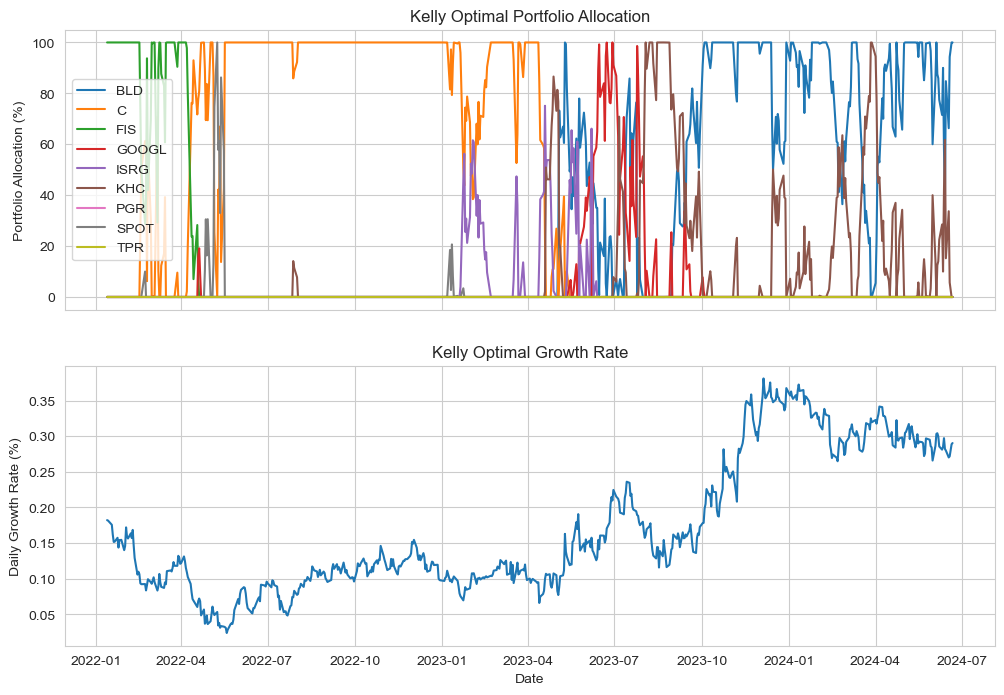

In [54]:
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)

ax[0].plot(optimized_portfolio.loc[:, (slice(None), 'fraction')] * 100)
ax[0].set_ylabel('Portfolio Allocation (%)')
ax[0].set_title('Kelly Optimal Portfolio Allocation')
labels = [i for i in list(optimized_portfolio.columns.levels[0]) if i in portfolio]
ax[0].legend(labels=labels)

ax[1].plot((optimized_portfolio.loc[:, 'g'] - 1) * 100)

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Growth Rate (%)')
ax[1].set_title('Kelly Optimal Growth Rate')

plt.show()

In [92]:
usd_investment_amount = mxn_investment_amount / mxn_to_usd_exchange_rate

mean_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).mean()['g'] 
stdev_kelly =  (optimized_portfolio.loc[:, 'g'] - 1).std()['g']
df_portfolio = optimized_portfolio.loc[:, (slice(None), 'fraction')]

# Final report:
print(f'Kelly Criterion Portfolio (MXN amount: {mxn_investment_amount}. USD amount: {usd_investment_amount}):')
print(f'   -Expected earns (daily): {mean_kelly * 100:.2f}%.')
print(f'\tExpected amount (Yearly): ${usd_investment_amount*mean_kelly*52*5:.2f}')
print(f'   -Variance: +/-{stdev_kelly * 100:.2f}%')
print(f'\tExpected variance amount (Yearly): +/-${usd_investment_amount*stdev_kelly*52*5:.2f}')
print('   -Portfolio composition:')
for symbol, percentage in df_portfolio.mean().sort_values(ascending= False).items():
    print(f'\tStock: {symbol[0]}. \tPercentage: {percentage*100:.2f}%.\tAmount: ${percentage * usd_investment_amount:.2f}.')

Kelly Criterion Portfolio (MXN amount: 10000.0. USD amount: 540.5405405405405):
   -Expected earns (daily): 0.17%.
	Expected amount (Yearly): $239.42
   -Variance: +/-0.09%
	Expected variance amount (Yearly): +/-$132.63
   -Portfolio composition:
	Stock: PGR. 	Percentage: 40.05%.	Amount: $216.51.
	Stock: SPOT. 	Percentage: 30.75%.	Amount: $166.22.
	Stock: BLD. 	Percentage: 11.22%.	Amount: $60.64.
	Stock: GOOGL. 	Percentage: 9.22%.	Amount: $49.83.
	Stock: ISRG. 	Percentage: 4.72%.	Amount: $25.53.
	Stock: TPR. 	Percentage: 3.00%.	Amount: $16.21.
	Stock: KHC. 	Percentage: 1.04%.	Amount: $5.62.
	Stock: C. 	Percentage: 0.00%.	Amount: $0.00.
	Stock: FIS. 	Percentage: 0.00%.	Amount: $0.00.


## Conclusiones
Que mejor que un modelo de optimización de portafolios que 2 modelos. Ambos asumen propiedades de la distribución de los datos que no se cumplen pero que pueden ser una buena aproximación al modelo real de los datos. ¿Quieres jugar con las salidas de los modelos?, Adelante!, prueba diferentes listas de stocks e itera hasta tener tu portafolio ideal, el riesgo se reduce (en cierta forma, pero no se elimina) mientras que los retornos mejoran (pero yo no apostaría a que esto ocurre en el 100% de casos). 

# Referencias
* Kanungo, D. K. (2023). *Probabilistic Machine Learning for Finance and Investment: A Primer to Generative AI with Python*. O'Reilly. p. 339.
* Raposa (2022). *How to use Python and the Kelly Criterion to Optimize your Stock Portfolio*. Disponible en [https://raposa.trade/blog/how-to-use-python-and-the-kelly-criterion-to-optimize-your-stock-portfolio/]. Consultado el 20 de junio de 2024.